In [13]:
import numpy as np
import pandas as pd
import time
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize
import seaborn as sns

In [3]:
new_transactions = pd.read_csv('C:/Users/Anzhi Tian/Desktop/ELO/elo-data/new_merchant_transactions.csv',
                               parse_dates=['purchase_date'])

In [14]:
train = pd.read_csv('C:/Users/Anzhi Tian/Desktop/ELO/elo-data/train.csv',parse_dates=['first_active_month'])

In [15]:
train['target_raw'] = 2**train['target']

In [16]:
train.loc[train['target_raw']>1,'loyalty'] = 'Loyal Customer'

In [17]:
train.loc[train['target_raw']<1,'loyalty'] = 'Non-loyal Customer'

In [29]:
data = pd.merge(new_transactions, train, on = 'card_id')

In [30]:
data.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,category_2,state_id,subsector_id,first_active_month,feature_1,feature_2,feature_3,target,target_raw,loyalty
0,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,...,NaN,-1,29,2016-08-01,1,1,0,-4.839243,0.034934,Non-loyal Customer
1,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,...,1.0,9,16,2016-08-01,1,1,0,-4.839243,0.034934,Non-loyal Customer
2,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.263697,...,1.0,9,10,2016-08-01,1,1,0,-4.839243,0.034934,Non-loyal Customer
3,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.553787,...,1.0,9,19,2016-08-01,1,1,0,-4.839243,0.034934,Non-loyal Customer
4,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.596643,...,1.0,9,37,2016-08-01,1,1,0,-4.839243,0.034934,Non-loyal Customer


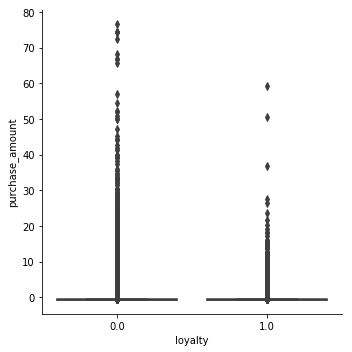

In [12]:
sns.catplot(x='loyalty',y='purchase_amount',data=data,kind='box')

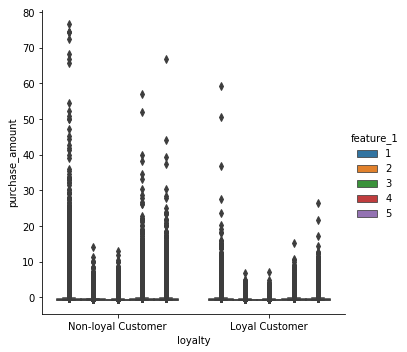

In [31]:
sns.catplot(x='loyalty',y='purchase_amount',data=data,kind='box',hue='feature_1')

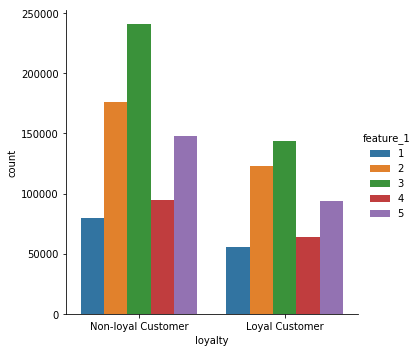

In [32]:
sns.catplot('loyalty',data=data,kind='count',hue='feature_1')

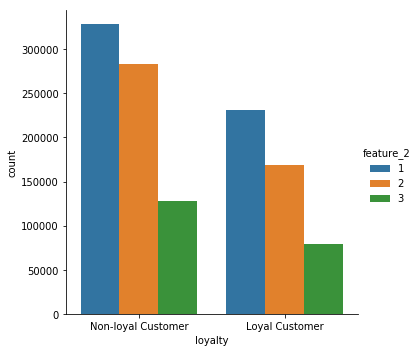

In [33]:
sns.catplot('loyalty',data=data,kind='count',hue='feature_2')

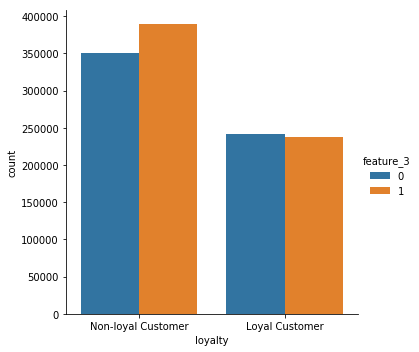

In [34]:
sns.catplot('loyalty',data=data,kind='count',hue='feature_3')

MemoryError: 

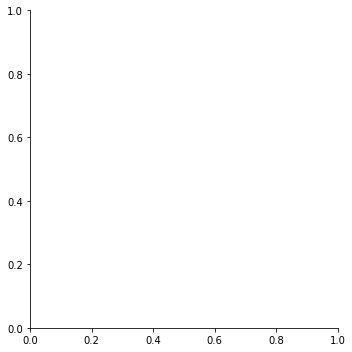

In [49]:
sns.catplot(x='loyalty',y='purchase_amount',data=data,kind='box',hue='feature_2')

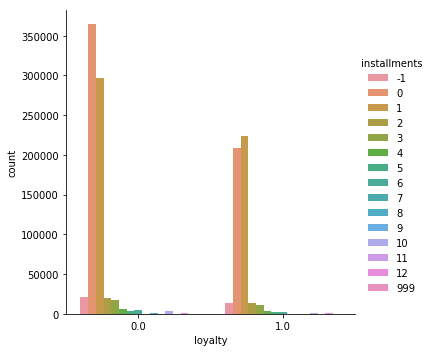

In [20]:
sns.catplot('loyalty',data=data,kind='count',hue='installments')

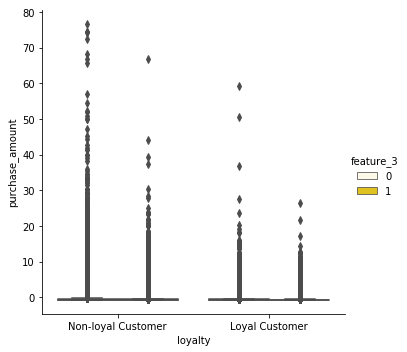

In [39]:
sns.catplot(x='loyalty',y='purchase_amount',data=data,kind='box',hue='feature_3',color='gold')

In [25]:
data.to_csv('newloyalty.csv')

In [1]:
hist_transactions = pd.read_csv('C:/Users/Anzhi Tian/Desktop/ELO/elo-data/historical_transactions.csv',
                               parse_dates=['purchase_date'])

NameError: name 'pd' is not defined

In [11]:
data1 = pd.merge(hist_transactions, train, on = 'card_id')

MemoryError: 

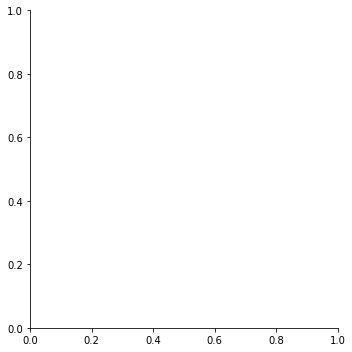

In [12]:
sns.catplot(x='loyalty',y='purchase_amount',data=data1,kind='box',hue='feature_1')

In [ ]:
sns.catplot('loyalty',data=data1,kind='count',hue='feature_1')

In [1]:
sns.catplot(x='loyalty',y='purchase_amount',data=data1,kind='box',hue='feature_2')

NameError: name 'sns' is not defined

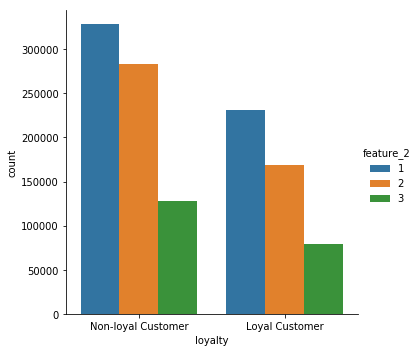

In [46]:
sns.catplot('loyalty',data=data1,kind='count',hue='feature_2')

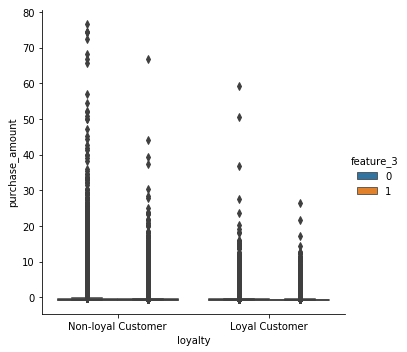

In [47]:
sns.catplot(x='loyalty',y='purchase_amount',data=data1,kind='box',hue='feature_3')

MemoryError: 

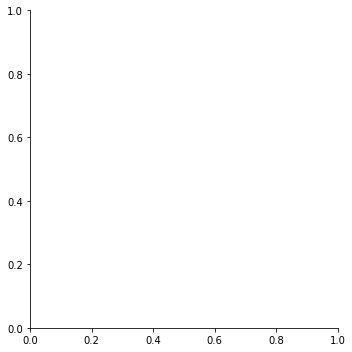

In [48]:
sns.catplot('loyalty',data=data1,kind='count',hue='feature_2')